기본적인 Dense layer 을 여러번 쌓아서 학습 시도함, 처음에는 activiation function 을 relu 로 했으나 기울기가 급격하게 변화해서 그 부분을 보안하고자 sigmoid를 사용하였으나 크게 변하지는 않음

Epoch 1/30
11/11 [==============================] - 2s 22ms/step - loss: 0.7211 - accuracy: 0.3027 - val_loss: 0.7014 - val_accuracy: 0.1294
Epoch 2/30
11/11 [==============================] - 0s 8ms/step - loss: 0.7035 - accuracy: 0.3442 - val_loss: 0.6991 - val_accuracy: 0.5529
Epoch 3/30
11/11 [==============================] - 0s 7ms/step - loss: 0.6983 - accuracy: 0.3412 - val_loss: 0.6943 - val_accuracy: 0.1294
Epoch 4/30
11/11 [==============================] - 0s 8ms/step - loss: 0.7002 - accuracy: 0.2908 - val_loss: 0.6967 - val_accuracy: 0.2471
Epoch 5/30
11/11 [==============================] - 0s 9ms/step - loss: 0.6962 - accuracy: 0.2226 - val_loss: 0.6950 - val_accuracy: 0.1294
Epoch 6/30
11/11 [==============================] - 0s 9ms/step - loss: 0.6957 - accuracy: 0.2967 - val_loss: 0.6945 - val_accuracy: 0.5529
Epoch 7/30
11/11 [==============================] - 0s 8ms/step - loss: 0.6939 - accuracy: 0.3858 - val_loss: 0.6941 - val_accuracy: 0.2471
Epoch 8/30
11/11 [=

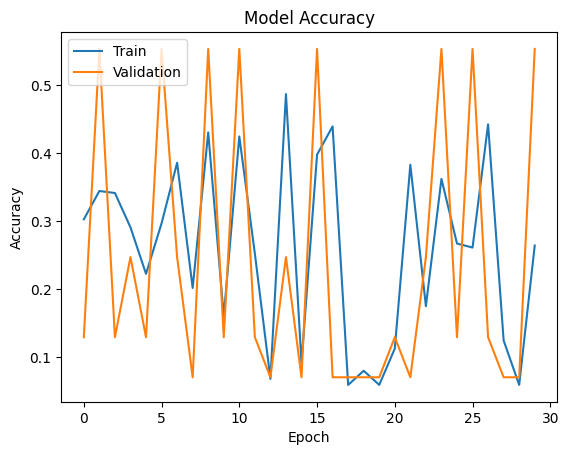

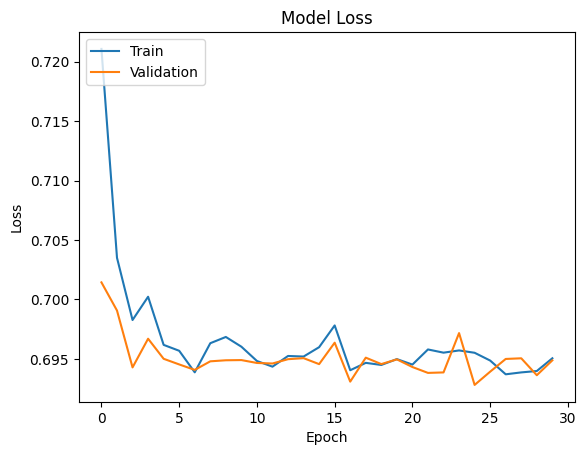

In [ ]:

# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 4
# 데이터 개수
num_samples = 422

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(128, activation='tanh'))  # Dense 레이어
model.add(tf.keras.layers.Dense(64, activation='tanh'))  # Dense 레이어
model.add(tf.keras.layers.Dense(32, activation='tanh'))  # Dense 레이어

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, outputvec_dips, epochs=30, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5625
Test Loss: 0.6939002871513367
Test Accuracy: 0.5625


시간계열 데이터다 보니 16프레임 에 5개의 뷰를 모두 담은 데이터를 이용해서 rnn,gru,transformer 등 sequnce를 다룰 수 있는 모델에다가 넣어보았으나 성능이 크게 변하지 않음

Epoch 1/50
11/11 [==============================] - 4s 31ms/step - loss: 385.7091 - accuracy: 0.1691 - val_loss: 72.1652 - val_accuracy: 0.1294
Epoch 2/50
11/11 [==============================] - 0s 12ms/step - loss: 43.6895 - accuracy: 0.1632 - val_loss: 24.5220 - val_accuracy: 0.1294
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 21.4926 - accuracy: 0.1513 - val_loss: 18.0874 - val_accuracy: 0.2941
Epoch 4/50
11/11 [==============================] - 0s 13ms/step - loss: 18.9419 - accuracy: 0.1751 - val_loss: 27.5689 - val_accuracy: 0.5529
Epoch 5/50
11/11 [==============================] - 0s 12ms/step - loss: 17.9960 - accuracy: 0.2700 - val_loss: 8.6741 - val_accuracy: 0.1294
Epoch 6/50
11/11 [==============================] - 0s 11ms/step - loss: 10.9683 - accuracy: 0.2552 - val_loss: 6.3269 - val_accuracy: 0.1294
Epoch 7/50
11/11 [==============================] - 0s 11ms/step - loss: 8.8954 - accuracy: 0.2611 - val_loss: 8.0210 - val_accuracy: 0.5529
Ep

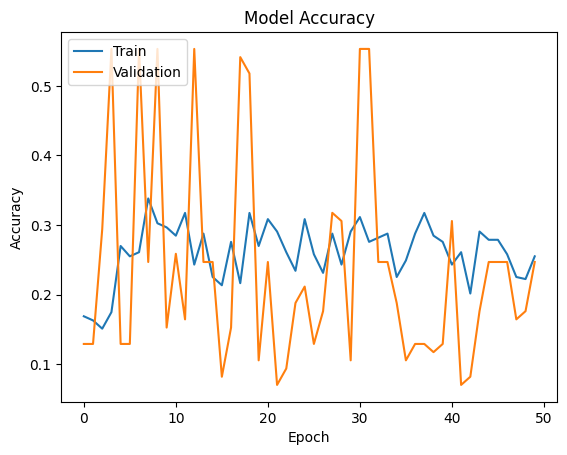

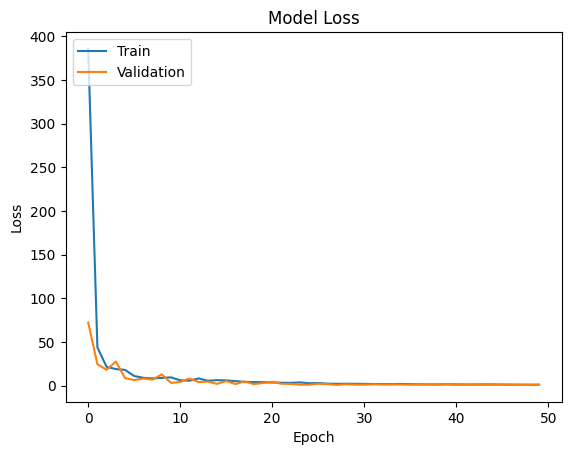

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Conv1D

# 입력 데이터의 크기
num_frames = 16
num_coords = 240
input_shape = (num_frames, num_coords)

# 출력 벡터의 크기
output_shape = 4

# 트랜스포머 모델 정의
def create_transformer_model(input_shape, output_shape):
    inputs = Input(shape=input_shape)

    # 멀티헤드 어텐션
    attention_output = MultiHeadAttention(
        num_heads=8, key_dim=64, dropout=0.1
    )(inputs, inputs)
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
    attention_output = Dropout(0.1)(attention_output + inputs)

    # 피드포워드 네트워크
    feed_forward_output = Conv1D(filters=512, kernel_size=2, strides=2,  activation="relu")(attention_output)
    feed_forward_output = Conv1D(filters=256, kernel_size=2, strides=2, activation="relu")(feed_forward_output)


    model = Model(inputs=inputs, outputs=feed_forward_output)
    return model

# 모델 생성
model = create_transformer_model(input_shape, output_shape)

# GlobalAveragePooling1D 레이어 추가
global_average_output = GlobalAveragePooling1D()(model.output)

# 출력 레이어 추가
output = Dense(output_shape, activation='sigmoid')(global_average_output)

# 모델 재구성
model = Model(inputs=model.input, outputs=output)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, outputvec_dips, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 6ms/step - loss: 0.6868 - accuracy: 0.0764
Test Loss: 0.6868391036987305
Test Accuracy: 0.0763888880610466


기존에 데이터 형식이 422,16,5 48로  네트워크에 학습을 시킬 때 16,240 의 형태로 바꿔줘야 해서 기존에 view 가 5개로 촬영된 부분을 활용하지 못함, 그래서 데이터 표현 형식을 바꾼 후에 각각의 view에대한 모델을 만들어줘서 결과를 합쳐서 예측하는 모델을 만듬

In [ ]:
data_changed.shape

(422, 5, 16, 48)

In [ ]:

input_ = Input(shape=(5, 16, 48))
attention = MultiHeadAttention(num_heads=8, key_dim=16)

x1 = attention(input_[:, 0, :, :], input_[:, 0, :, :])
x1 = LayerNormalization(epsilon=1e-6)(x1)
x1 = TimeDistributed(Dense(4, activation=relu))(x1)
x1 = LayerNormalization(epsilon=1e-6)(x1)
x1 = Flatten()(x1)
x1 = Dense(16, activation=relu)(x1)
x1 = Dropout(0.2)(x1)
output = Dense(4, activation="sigmoid")(x1)
x1 = Model(inputs=input_, outputs=output)


x2 = attention(input_[:, 1, :, :], input_[:, 1, :, :])
x2 = LayerNormalization(epsilon=1e-6)(x2)
x2 = TimeDistributed(Dense(4, activation=relu))(x2)
x2 = LayerNormalization(epsilon=1e-6)(x2)
x2 = Flatten()(x2)
x2 = Dense(16, activation=relu)(x2)
x2 = Dropout(0.2)(x2)
output = Dense(4, activation="sigmoid")(x2)
x2 = Model(inputs=input_, outputs=output)

x3 = attention(input_[:, 2, :, :], input_[:, 2, :, :])
x3 = LayerNormalization(epsilon=1e-6)(x3)
x3 = TimeDistributed(Dense(4, activation=relu))(x3)
x3 = LayerNormalization(epsilon=1e-6)(x3)
x3 = Flatten()(x3)
x3 = Dense(16, activation=relu)(x3)
x3 = Dropout(0.2)(x3)
output = Dense(4, activation="sigmoid")(x3)
x3 = Model(inputs=input_, outputs=output)
x4 = attention(input_[:, 3, :, :], input_[:, 3, :, :])
x4 = LayerNormalization(epsilon=1e-6)(x4)
x4 = TimeDistributed(Dense(4, activation=relu))(x4)
x4 = LayerNormalization(epsilon=1e-6)(x4)
x4 = Flatten()(x4)
x4 = Dense(16, activation=relu)(x4)
x4 = Dropout(0.2)(x4)
output = Dense(4, activation="sigmoid")(x4)
x4 = Model(inputs=input_, outputs=output)



x5 = attention(input_[:, 4, :, :], input_[:, 4, :, :])
x5 = LayerNormalization(epsilon=1e-6)(x5)
x5 = TimeDistributed(Dense(4, activation=relu))(x5)
x5 = LayerNormalization(epsilon=1e-6)(x5)
x5 = Flatten()(x5)
x5 = Dense(16, activation=relu)(x5)
x5 = Dropout(0.2)(x5)
output = Dense(4, activation="sigmoid")(x5)
x5 = Model(inputs=input_, outputs=output)

combined = concatenate([x1.output, x2.output, x3.output, x4.output, x5.output])
z = Dense(4, activation="sigmoid")(combined)

model = Model(inputs=input_, outputs=z)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history =model.fit(data_changed, y_label, batch_size=32, epochs=50, validation_split=0.2)


Epoch 1/50
11/11 [==============================] - 13s 78ms/step - loss: 0.7385 - accuracy: 0.2522 - val_loss: 0.7041 - val_accuracy: 0.2471
Epoch 2/50
11/11 [==============================] - 0s 22ms/step - loss: 0.7044 - accuracy: 0.2463 - val_loss: 0.6950 - val_accuracy: 0.2471
Epoch 3/50
11/11 [==============================] - 0s 21ms/step - loss: 0.7029 - accuracy: 0.1276 - val_loss: 0.6953 - val_accuracy: 0.0706
Epoch 4/50
11/11 [==============================] - 0s 21ms/step - loss: 0.6942 - accuracy: 0.2463 - val_loss: 0.6948 - val_accuracy: 0.5529
Epoch 5/50
11/11 [==============================] - 0s 21ms/step - loss: 0.6967 - accuracy: 0.3353 - val_loss: 0.6949 - val_accuracy: 0.5529
Epoch 6/50
11/11 [==============================] - 0s 25ms/step - loss: 0.6961 - accuracy: 0.2819 - val_loss: 0.6951 - val_accuracy: 0.0706
Epoch 7/50
11/11 [==============================] - 0s 20ms/step - loss: 0.6960 - accuracy: 0.2047 - val_loss: 0.6941 - val_accuracy: 0.0706
Epoch 8/50
1


각각의 모델의 값을 합치는것이 아닌, 각각의 추정된 label 을 majority vote 형식으로 받아와서 train 을 진행하려 했으나 그럴경우 모델과 결과들과의 연결이 끊기거나 미분이 불가능한 문제가 생김


In [ ]:
import tensorflow as tf
import math

from tensorflow.keras.layers import Input, GRU, concatenate, Dense
from tensorflow.keras.models import Model

threshold = 0.5

input_ = Input(shape=(5, 16, 48))

x1_input = input_[:, 0, :, :]
x1 = GRU(4, return_sequences=False)(x1_input)
x1 = Dense(4, activation="sigmoid")(x1)
x1_model = Model(inputs=x1_input, outputs=tf.where(x1 >= threshold, tf.ones_like(x1), tf.zeros_like(x1)))

x2_input = input_[:, 1, :, :]
x2 = GRU(4, return_sequences=False)(x2_input)
x2 = Dense(4, activation="sigmoid")(x2)
x2_model = Model(inputs=x2_input, outputs=tf.where(x2 >= threshold, tf.ones_like(x2), tf.zeros_like(x2)))

x3_input = input_[:, 2, :, :]
x3 = GRU(4, return_sequences=False)(x3_input)
x3 = Dense(4, activation="sigmoid")(x3)
x3_model = Model(inputs=x3_input, outputs=tf.where(x3 >= threshold, tf.ones_like(x3), tf.zeros_like(x3)))

x4_input = input_[:, 3, :, :]
x4 = GRU(4, return_sequences=False)(x4_input)
x4 = Dense(4, activation="sigmoid")(x4)
x4_model = Model(inputs=x4_input, outputs=tf.where(x4 >= threshold, tf.ones_like(x4), tf.zeros_like(x4)))

x5_input = input_[:, 4, :, :]
x5 = GRU(4, return_sequences=False)(x5_input)
x5 = Dense(4, activation="sigmoid")(x5)
x5_model = Model(inputs=x5_input, outputs=tf.where(x5 >= threshold, tf.ones_like(x5), tf.zeros_like(x5)))



# Apply majority vote
combined = concatenate([x1_model.output, x2_model.output, x3_model.output, x4_model.output, x5_model.output])
majority_vote = tf.reduce_mean(combined, axis=1) >= 0.5


model = Model(inputs=input_, outputs=majority_vote)



ValueError: ignored

그래서 view 데이터 별로 학습을 시킨뒤 output을 vote 형식으로 test 하는 방식을 사용해봄

In [ ]:
view1=[]
view2=[]
view3=[]
view4=[]
view5=[]
for i in data_changed:
    view1.append(i[0])
    view2.append(i[1])
    view3.append(i[2])
    view4.append(i[3])
    view5.append(i[4])

view1=np.array(view1)
view2=np.array(view2)
view3=np.array(view3)
view4=np.array(view4)
view5=np.array(view5)


In [ ]:
test1=[]
test2=[]
test3=[]
test4=[]
test5=[]
for i in test_data:
    test1.append(i[0])
    test2.append(i[1])
    test3.append(i[2])
    test4.append(i[3])
    test5.append(i[4])

test1=np.array(view1)
test2=np.array(view2)
test3=np.array(view3)
test4=np.array(view4)
test5=np.array(view5)

In [ ]:
dataset=[test1,test2,test3,test4,test5]

In [ ]:
import tensorflow as tf

# 입력 데이터 shape
input_shape = (16, 48)
# 출력 데이터 shape
output_shape = 4

models = []
for view_data in [view1, view2, view3, view4, view5]:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(4, input_shape=input_shape, return_sequences=False))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(view_data, outputvec_dips, epochs=30, batch_size=16, validation_split=0.2)
    models.append(model)  # 모델 자체를 저장

    # 모델 저장
    model.save(f'model_{len(models)}.h5')


Epoch 1/30
22/22 [==============================] - 3s 29ms/step - loss: 0.7445 - accuracy: 0.5638 - val_loss: 0.7379 - val_accuracy: 0.5529
Epoch 2/30
22/22 [==============================] - 0s 8ms/step - loss: 0.7241 - accuracy: 0.5638 - val_loss: 0.7213 - val_accuracy: 0.5529
Epoch 3/30
22/22 [==============================] - 0s 8ms/step - loss: 0.7112 - accuracy: 0.5638 - val_loss: 0.7119 - val_accuracy: 0.5529
Epoch 4/30
22/22 [==============================] - 0s 8ms/step - loss: 0.7042 - accuracy: 0.5638 - val_loss: 0.7056 - val_accuracy: 0.5529
Epoch 5/30
22/22 [==============================] - 0s 9ms/step - loss: 0.6996 - accuracy: 0.5638 - val_loss: 0.7013 - val_accuracy: 0.5529
Epoch 6/30
22/22 [==============================] - 0s 8ms/step - loss: 0.6970 - accuracy: 0.5638 - val_loss: 0.6990 - val_accuracy: 0.5529
Epoch 7/30
22/22 [==============================] - 0s 9ms/step - loss: 0.6956 - accuracy: 0.5638 - val_loss: 0.6978 - val_accuracy: 0.5529
Epoch 8/30
22/22 [=

In [ ]:
model_files = ['model_1.h5', 'model_2.h5', 'model_3.h5', 'model_4.h5', 'model_5.h5']

loaded_models = []
for model_file in model_files:
    loaded_model = tf.keras.models.load_model(model_file)
    loaded_models.append(loaded_model)

In [ ]:
import numpy as np

# Majority Vote 함수
def majority_vote(predictions):
    votes = np.round(predictions)  # 반올림하여 0 또는 1로 변환
    majority = np.mean(votes, axis=0)  # 열 단위로 평균 계산
    return np.round(majority)  # 다수결로 결정된 값을 반올림하여 0 또는 1로 변환

# 테스트 세트에 대한 예측 수행
test_predictions = []
for model,test_data in zip(loaded_models,dataset):
    prediction = model.predict(test_data)  # test_data: 테스트 세트 입력 데이터
    test_predictions.append(prediction)

# Majority Vote를 통한 예측
ensemble_prediction = majority_vote(test_predictions)



14/14 [==============================] - 0s 2ms/step


예측값이 이상한거 같아서 결과를 직접 슬라이스해서 살펴봄

In [ ]:
ensemble_prediction[:30]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)

모든 레이블을 1로 예측하게 되는 문제가 생김을 알 수 있음

한꺼번에 4가지의 자세 기준을 잡아내는것이 어렵다고 판단하여 4차원 벡터를 1차원 씩 분리 한 후에, 각각 의 아웃풋에 맞춰 학습을 시켜봄 

In [ ]:
# 4차원 벡터 4개로 나눠주는 과정

y1_test=[]
y2_test=[]
y3_test=[]
y4_test=[]
for i in testoutput_dips:
    y1_test.append([i[0]])
    y2_test.append([i[1]])
    y3_test.append([i[2]])
    y4_test.append([i[3]])
y1_test=np.array(y1_test)
y2_test=np.array(y2_test)
y3_test=np.array(y3_test)
y4_test=np.array(y4_test)

Epoch 1/100
22/22 [==============================] - 3s 24ms/step - loss: 0.8221 - accuracy: 0.5994 - val_loss: 47.6253 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.6904 - accuracy: 0.6350 - val_loss: 10.9402 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6952 - accuracy: 0.6469 - val_loss: 1.2025 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 0.6058 - accuracy: 0.6884 - val_loss: 3.3516 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 0.5439 - accuracy: 0.7537 - val_loss: 4.4121 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 8ms/step - loss: 0.5376 - accuracy: 0.7300 - val_loss: 7.1819 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss: 

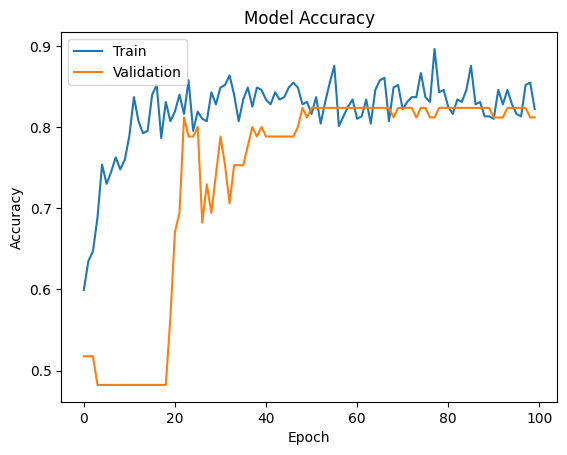

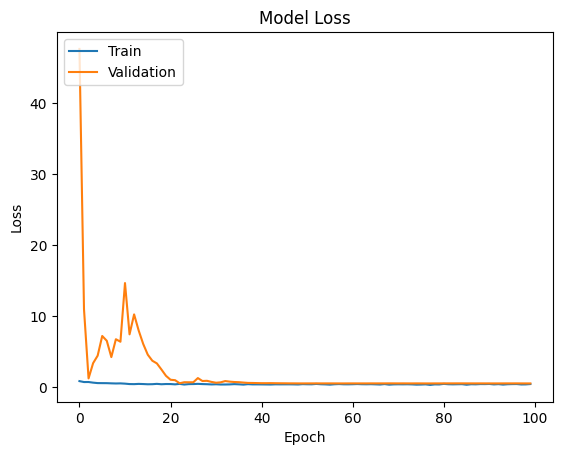

In [ ]:
#가장 좋은 아웃풋 내놓음 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 422
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y1, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, y1_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.8403
Test Loss: 0.49949169158935547
Test Accuracy: 0.8402777910232544


Epoch 1/100
22/22 [==============================] - 3s 18ms/step - loss: 0.9180 - accuracy: 0.5757 - val_loss: 46.0411 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8909 - accuracy: 0.5816 - val_loss: 23.9089 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8907 - accuracy: 0.5668 - val_loss: 16.6922 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 9ms/step - loss: 0.7709 - accuracy: 0.5846 - val_loss: 6.9911 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 0.7956 - accuracy: 0.5935 - val_loss: 6.0954 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8273 - accuracy: 0.5816 - val_loss: 0.5817 - val_accuracy: 0.6706 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - loss:

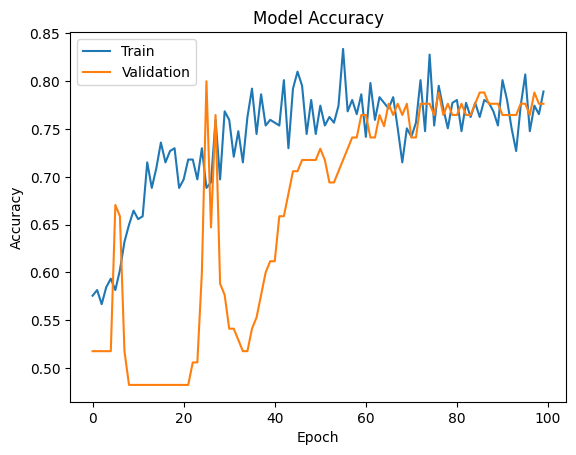

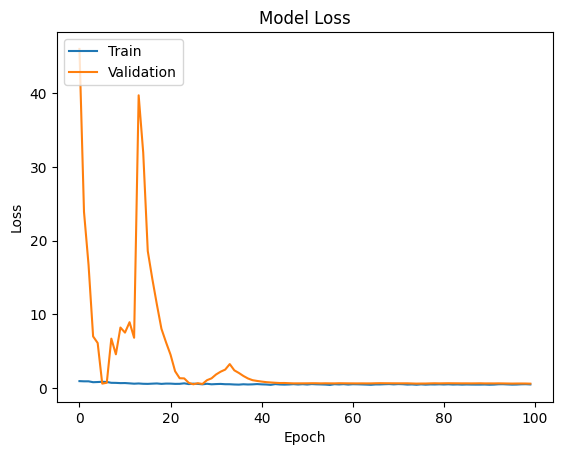

In [ ]:

# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 422
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try_y2.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y2, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, y2_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 5.3322 - accuracy: 0.7361
Test Loss: 5.33223819732666
Test Accuracy: 0.7361111044883728


Epoch 1/100
22/22 [==============================] - 3s 19ms/step - loss: 0.9004 - accuracy: 0.5905 - val_loss: 15.9895 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.6662 - accuracy: 0.6944 - val_loss: 5.5540 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6090 - accuracy: 0.6973 - val_loss: 5.6436 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6025 - accuracy: 0.7092 - val_loss: 11.8569 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.4703 - accuracy: 0.7656 - val_loss: 11.0281 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 8ms/step - loss: 0.5270 - accuracy: 0.7685 - val_loss: 10.3305 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 10ms/step - los

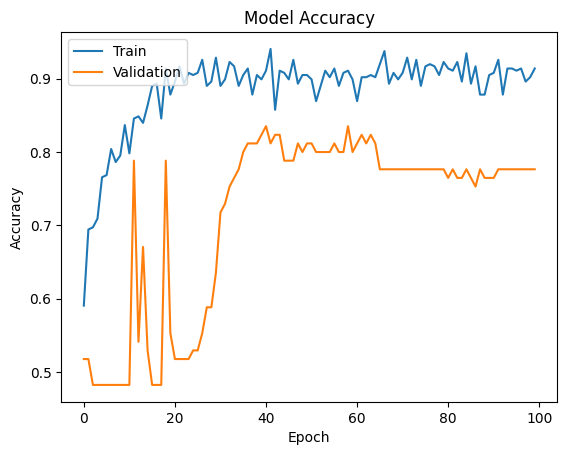

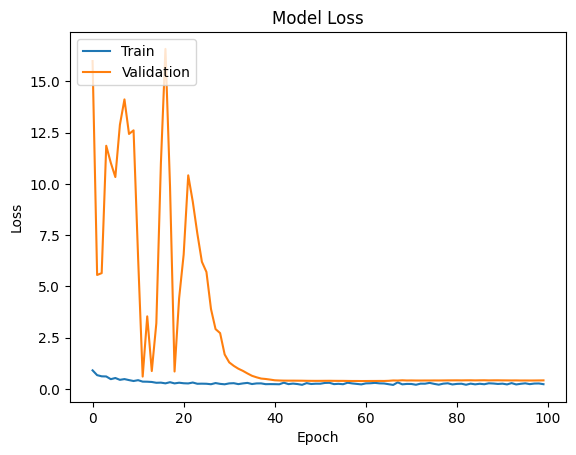

In [ ]:
#가장 좋은 아웃풋 내놓음 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 422
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try_y3.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y3, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, y3_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 0s 4ms/step - loss: 0.3546 - accuracy: 0.8681
Test Loss: 0.3545765280723572
Test Accuracy: 0.8680555820465088


Epoch 1/100
22/22 [==============================] - 3s 18ms/step - loss: 0.9091 - accuracy: 0.5430 - val_loss: 36.5517 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 9ms/step - loss: 0.8140 - accuracy: 0.5608 - val_loss: 27.5671 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.8262 - accuracy: 0.5697 - val_loss: 21.4465 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 9ms/step - loss: 0.7733 - accuracy: 0.6113 - val_loss: 17.6104 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6716 - accuracy: 0.6706 - val_loss: 13.4351 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6615 - accuracy: 0.6617 - val_loss: 14.4577 - val_accuracy: 0.5176 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 7ms/step - lo

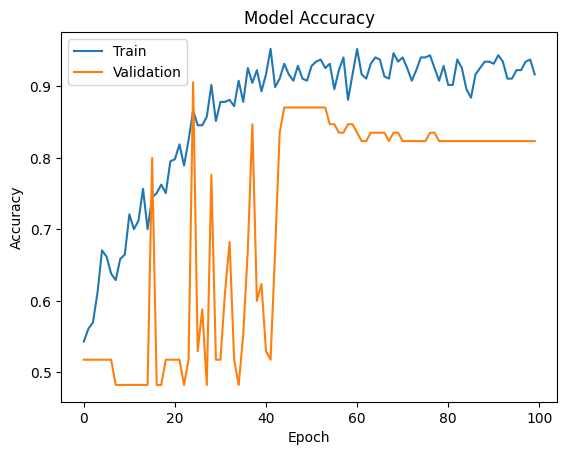

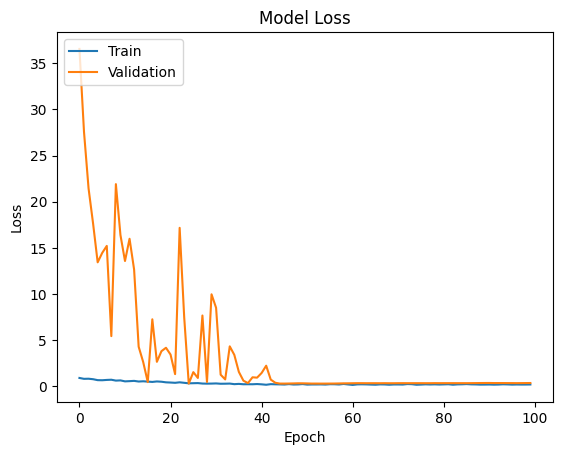

In [ ]:
#가장 좋은 아웃풋 내놓음 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 422
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try_y3.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y4, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, y4_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

5/5 [==============================] - 0s 4ms/step - loss: 0.8322 - accuracy: 0.7361
Test Loss: 0.8322107195854187
Test Accuracy: 0.7361111044883728


결과들이 훨씬 좋게 나온것을 알 수 있음

이 밑으로도 여러 모델에 시험을 해봤으나 결과가 좋지 못함, 오히려 가장 단순한 모델이 가장 성능이 좋게나옴, 딥스 데이터 말고 다른 데이터셋에도 적용해봤으나 모두 비슷하게 결과가 나옴

(이 밑으로는 발표할 떄는 쭊 내릴겁니다.)

In [ ]:
#가장 좋은 아웃풋 내놓음 


# 입력 데이터 shape
input_shape = (16,240)
# 출력 데이터 shape
output_shape = 1
# 데이터 개수
num_samples = 422
K.clear_session()

# 모델 생성
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=input_shape)) 
model.add(tf.keras.layers.Dense(64, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(32, activation='relu'))  # Dense 레이어
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))  # 출력 레이어
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y1, epochs=100, batch_size=16, validation_split=0.2,callbacks=callbacks_list)

draw(history)

Epoch 1/100
22/22 [==============================] - 4s 30ms/step - loss: 0.6913 - accuracy: 0.4629 - val_loss: 0.7100 - val_accuracy: 0.5176
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.5341 - val_loss: 0.7057 - val_accuracy: 0.5176
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 0.6907 - accuracy: 0.5312 - val_loss: 0.7024 - val_accuracy: 0.5176
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6956 - accuracy: 0.4481 - val_loss: 0.6993 - val_accuracy: 0.5176
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 0.6960 - accuracy: 0.4896 - val_loss: 0.6974 - val_accuracy: 0.5176
Epoch 6/100
22/22 [==============================] - 0s 12ms/step - loss: 0.6925 - accuracy: 0.4926 - val_loss: 0.6953 - val_accuracy: 0.5176
Epoch 7/100
22/22 [==============================] - 0s 13ms/step - loss: 0.6948 - accuracy: 0.4807 - val_loss: 0.6941 - val_accuracy: 0.5176
Epoch 8/10

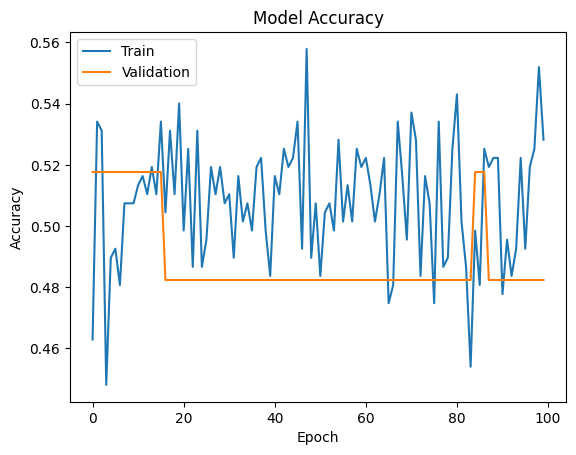

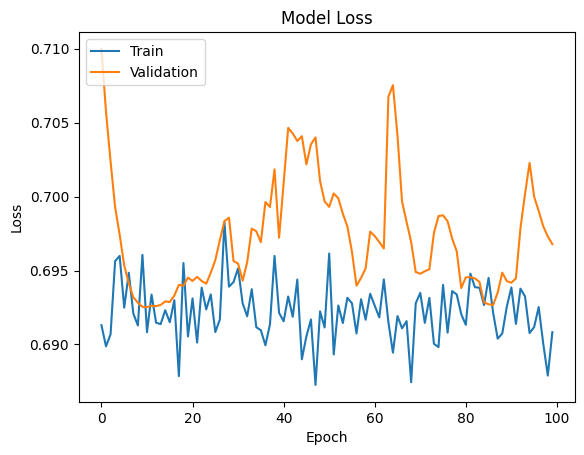

In [ ]:

import tensorflow as tf

# 입력 데이터 shape
input_shape = (16,240)  
# 출력 데이터 shape
output_shape = 1

# 모델 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(4, input_shape=input_shape, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))
# 모델 컴파일

callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='DNN_try.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 모델 요약 출력

history = model.fit(total_data_dips, y1, epochs=100, batch_size=16, validation_split=0.2)



In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, y1_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5069
Test Loss: 0.6895498037338257
Test Accuracy: 0.5069444179534912


In [ ]:
draw(history)

Epoch 1/50
11/11 [==============================] - 5s 59ms/step - loss: 0.7595 - accuracy: 0.2136 - val_loss: 0.7393 - val_accuracy: 0.2471
Epoch 2/50
11/11 [==============================] - 0s 11ms/step - loss: 0.7173 - accuracy: 0.2819 - val_loss: 0.7315 - val_accuracy: 0.2471
Epoch 3/50
11/11 [==============================] - 0s 12ms/step - loss: 0.7252 - accuracy: 0.2997 - val_loss: 0.7282 - val_accuracy: 0.2471
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.7126 - accuracy: 0.2700 - val_loss: 0.7243 - val_accuracy: 0.2471
Epoch 5/50
11/11 [==============================] - 0s 16ms/step - loss: 0.7037 - accuracy: 0.2641 - val_loss: 0.7189 - val_accuracy: 0.2471
Epoch 6/50
11/11 [==============================] - 0s 17ms/step - loss: 0.6993 - accuracy: 0.2463 - val_loss: 0.7177 - val_accuracy: 0.2471
Epoch 7/50
11/11 [==============================] - 0s 17ms/step - loss: 0.7110 - accuracy: 0.2344 - val_loss: 0.7158 - val_accuracy: 0.2471
Epoch 8/50
11

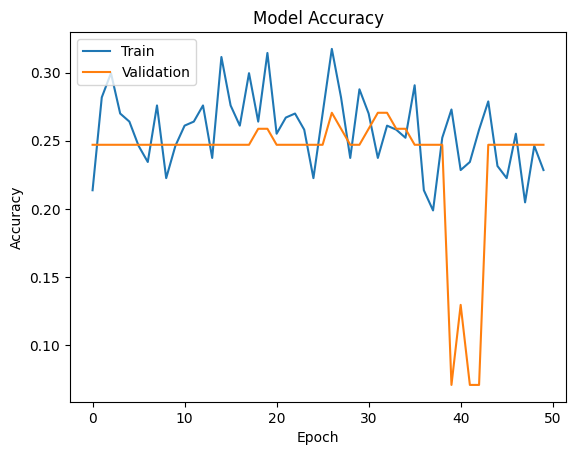

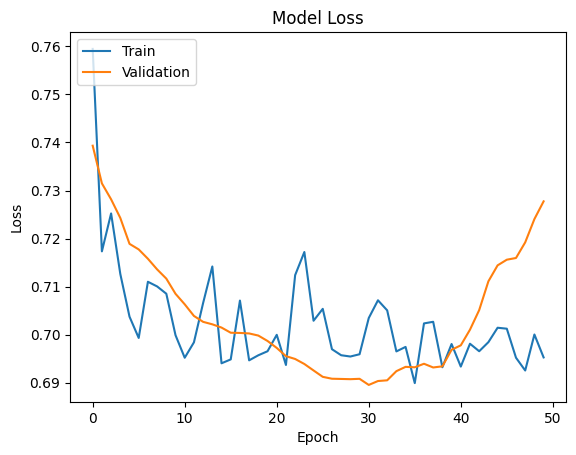

In [ ]:
import tensorflow as tf

# 입력 데이터 shape
input_shape = (16,240)  
# 출력 데이터 shape
output_shape = 4

# 모델 생성
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(16, input_shape=input_shape, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(output_shape, activation='sigmoid'))
callbacks_list = [
                  callbacks.ModelCheckpoint(filepath='GRU.h5', 
                                            monitor='val_loss', 
                                            save_best_only=True),
                  callbacks.ReduceLROnPlateau(monitor='val_loss',
                                              factor=0.1,
                                              patience=10)
                  ]
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(total_data_dips, outputvec_dips, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data_240, y1_test)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5069
Test Loss: 0.6895498037338257
Test Accuracy: 0.5069444179534912


Epoch 1/100
11/11 [==============================] - 3s 46ms/step - loss: 705.6901 - accuracy: 0.5045 - val_loss: 185.1409 - val_accuracy: 0.4824
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 76.4364 - accuracy: 0.4807 - val_loss: 15.5912 - val_accuracy: 0.5176
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 13.4905 - accuracy: 0.5015 - val_loss: 58.9749 - val_accuracy: 0.4824
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 20.4556 - accuracy: 0.5193 - val_loss: 0.8720 - val_accuracy: 0.5882
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 18.8851 - accuracy: 0.4570 - val_loss: 25.1669 - val_accuracy: 0.5176
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 21.2701 - accuracy: 0.4896 - val_loss: 39.9743 - val_accuracy: 0.4824
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 34.2210 - accuracy: 0.4570 - val_loss: 19.7056 - val_accuracy:

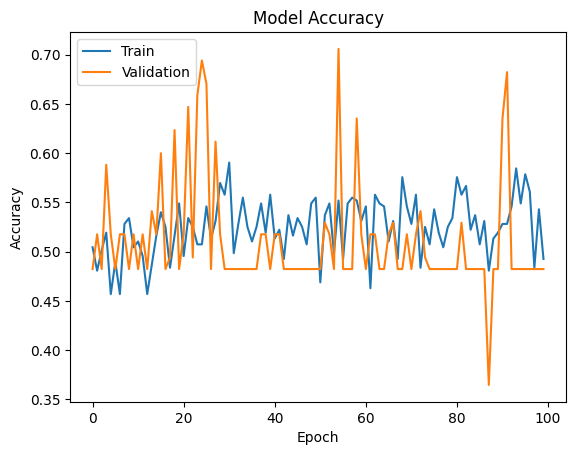

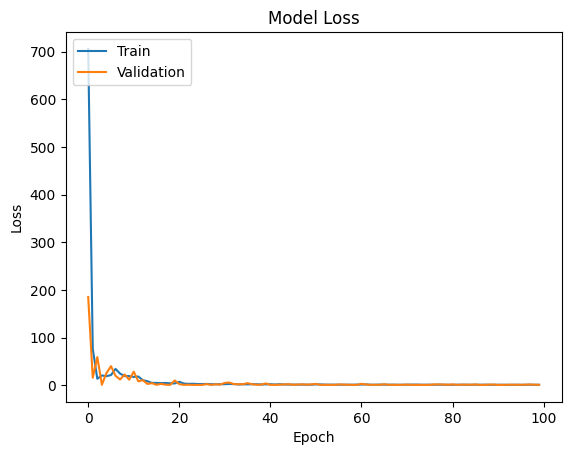

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Conv1D

# 입력 데이터의 크기
num_frames = 16
num_coords = 240
input_shape = (num_frames, num_coords)

# 출력 벡터의 크기
output_shape = 1

# 트랜스포머 모델 정의
def create_transformer_model(input_shape, output_shape):
    inputs = Input(shape=input_shape)

    # 멀티헤드 어텐션
    attention_output = MultiHeadAttention(
        num_heads=8, key_dim=64, dropout=0.1
    )(inputs, inputs)
    attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
    attention_output = Dropout(0.2)(attention_output + inputs)

    # 피드포워드 네트워크
    feed_forward_output = Conv1D(filters=512, kernel_size=2, strides=2,  activation="relu")(attention_output)
    feed_forward_output = Conv1D(filters=256, kernel_size=2, strides=2, activation="relu")(feed_forward_output)


    model = Model(inputs=inputs, outputs=feed_forward_output)
    return model

# 모델 생성
model = create_transformer_model(input_shape, output_shape)

# GlobalAveragePooling1D 레이어 추가
global_average_output = GlobalAveragePooling1D()(model.output)

# 출력 레이어 추가
output = Dense(output_shape, activation='sigmoid')(global_average_output)

# 모델 재구성
model = Model(inputs=model.input, outputs=output)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(total_data_dips, y1, epochs=100, batch_size=32, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)

# Print the evaluation results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 0s 6ms/step - loss: 0.6868 - accuracy: 0.0764
Test Loss: 0.6868391036987305
Test Accuracy: 0.0763888880610466


In [ ]:
data_changed.shape

(422, 5, 16, 48)

In [ ]:
y_label.shape

(422, 4)

In [ ]:
model=123

In [ ]:
from tensorflow.keras.layers import Input, GRU, concatenate, Dense,LSTM
from tensorflow.keras.models import Model

input_ = Input(shape=(5,16, 48))

x1 = LSTM(4, return_sequences=False)(input_[:, 0, :, :])
x1 = Model(inputs=input_, outputs=x1)

x2 = LSTM(4, return_sequences=False)(input_[:, 1, :, :])
x2 = Model(inputs=input_, outputs=x2)

x3 = LSTM(4, return_sequences=False)(input_[:, 2, :, :])
x3 = Model(inputs=input_, outputs=x3)

x4 = LSTM(4, return_sequences=False)(input_[:, 3, :, :])
x4 = Model(inputs=input_, outputs=x4)

x5 = LSTM(4, return_sequences=False)(input_[:, 4, :, :])
x5 = Model(inputs=input_, outputs=x5)

combined = concatenate([x1.output, x2.output, x3.output, x4.output, x5.output])
z = Dense(1, activation="sigmoid")(combined)

model = Model(inputs=input_, outputs=z)



In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(data_changed, y1, epochs=30, batch_size=32, validation_split=0.2)



Epoch 1/30
11/11 [==============================] - 11s 172ms/step - loss: 0.7029 - accuracy: 0.5134 - val_loss: 0.7088 - val_accuracy: 0.4941
Epoch 2/30
11/11 [==============================] - 0s 15ms/step - loss: 0.7013 - accuracy: 0.5134 - val_loss: 0.7064 - val_accuracy: 0.4941
Epoch 3/30
11/11 [==============================] - 0s 16ms/step - loss: 0.6998 - accuracy: 0.5134 - val_loss: 0.7045 - val_accuracy: 0.4941
Epoch 4/30
11/11 [==============================] - 0s 17ms/step - loss: 0.6985 - accuracy: 0.5134 - val_loss: 0.7022 - val_accuracy: 0.4941
Epoch 5/30
11/11 [==============================] - 0s 15ms/step - loss: 0.6944 - accuracy: 0.5134 - val_loss: 0.6896 - val_accuracy: 0.4941
Epoch 6/30
11/11 [==============================] - 0s 15ms/step - loss: 0.6960 - accuracy: 0.5134 - val_loss: 0.6926 - val_accuracy: 0.4941
Epoch 7/30
11/11 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.5134 - val_loss: 0.6930 - val_accuracy: 0.4941
Epoch 8/30
